# Data 
Kami akan menggunakan data dari kumpulan data Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction 
#### Kolom Fitur 
* id - ID unik untuk setiap rumah yang terjual 
* date - Tanggal penjualan rumah 
* price - Harga setiap rumah yang dijual 
* bedrooms - Jumlah kamar tidur 
* bathrooms - Jumlah kamar mandi, di mana 0,5 menyumbang kamar dengan toilet tetapi tidak ada pancuran 
* sqft_living - Ruang interior apartemen (meter persegi)
* sqft_lot - Luas lahan (meter persegi) 
* floors - Jumlah lantai 
* waterfront - Variabel dummy apakah apartemen itu menghadap ke tepi laut atau tidak 
* view - Indeks dari 0 hingga 4 tentang seberapa bagus tampilan properti itu 
* condition - Indeks dari 1 hingga 5 pada kondisi apartemen, 
* grade - Indeks dari 1 hingga 13, di mana 1-3 kurang dari konstruksi dan desain bangunan, 7 memiliki tingkat konstruksi dan desain rata-rata, dan 11-13 memiliki tingkat kualitas konstruksi dan desain yang tinggi. 
* sqft_above - Ukuran luas ruangan interior perumahan yang berada di atas permukaan tanah 
* sqft_basement - Ukuran luas ruangan interior perumahan yang berada di bawah permukaan tanah 
* yr_built - Tahun rumah pertama kali dibangun 
* yr_renovated - Tahun renovasi terakhir rumah 
* zipcode - Area kode pos rumah itu berada 
* lat - Lattitude * bujur - Bujur 
* sqft_living15 - Ukuran luas ruang interior perumahan untuk 15 tetangga terdekat 
* sqft_lot15 - Ukuran luas bidang tanah dari 15 tetangga terdekat

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')

In [3]:
df = pd.read_csv('kc_house_data.csv')

# EDA

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

tidak ada missing data

sebaran harga rumah


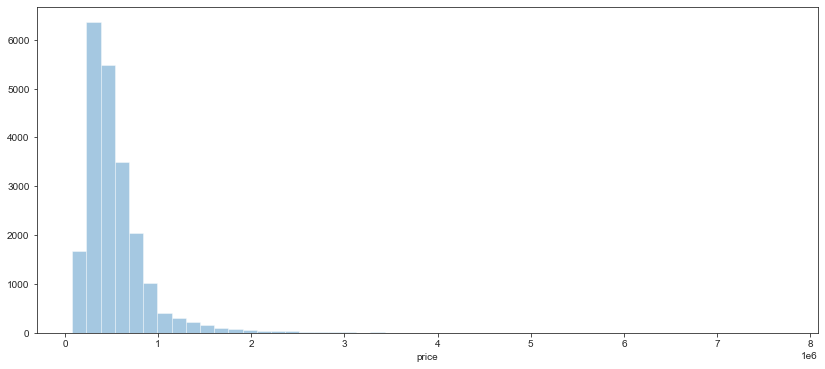

In [5]:
plt.figure(figsize=(14,6))
sns.distplot(df['price'],kde=False, bins=50)
print('sebaran harga rumah')

jumlah kamar tidur


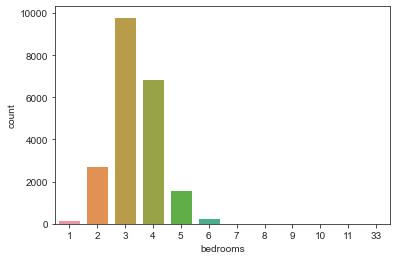

In [6]:
sns.countplot(df['bedrooms'])
print('jumlah kamar tidur')

pengaruh luas (meter persegi) terhadap harga


<Figure size 864x576 with 0 Axes>

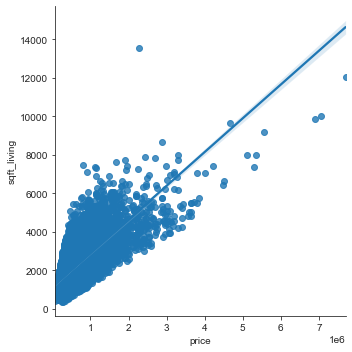

In [7]:
plt.figure(figsize=(12,8))
sns.lmplot(x='price',y='sqft_living',data=df,)
print('pengaruh luas (meter persegi) terhadap harga')

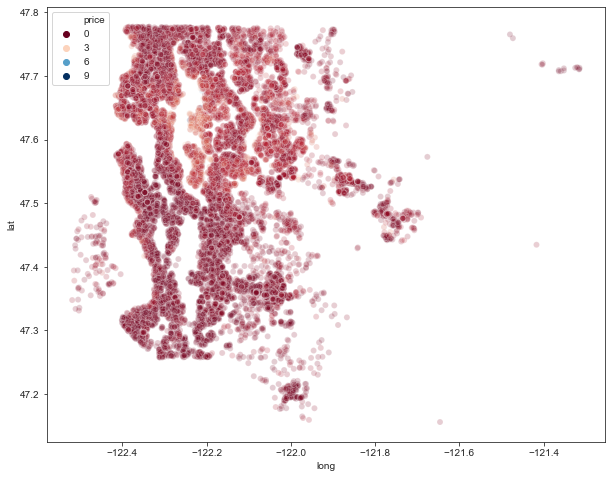

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='RdBu',alpha=0.2)

saya akan mencoba melakukan plot data harga terhadap lokasi berdasarkan zipcode, kurva tersebut bisa dicocokan dengan peta asli untuk melihat sebaran datanya. 

kemudian saya akan mencoba memodifikasi beberapa fitur untuk mendapatkan data yang lebih bermanfaat,
pertama saya melihat dulu tipe data dalam dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id kurang berguna dalam analisis ini sehingga saya memutuskan untuk drop kolom tersebut

In [10]:
df = df.drop('id',axis=1)

In [11]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

tipe data date saya akan modifikasi agar saya bisa melihat harga per bulan dan per tahun nya

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['month'] = df['date'].apply(lambda date:date.month)

In [14]:
df['year'] = df['date'].apply(lambda date:date.year)

In [15]:
df = df.drop('date',axis=1)

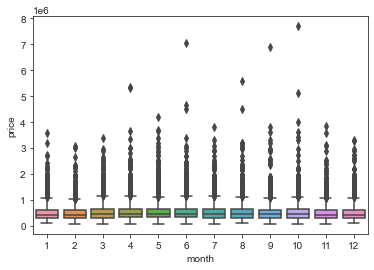

In [16]:
sns.boxplot(x='month',y='price',data=df)

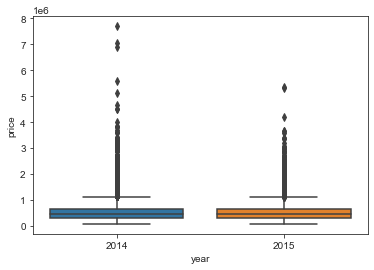

In [17]:
sns.boxplot(x='year',y='price',data=df)

kemudian saya akan drop data kategori lain  yaitu  zip code

In [18]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [20]:
df = df.drop('zipcode',axis=1)

# Treating Data

## Training Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [22]:
X = df.drop('price',axis=1)
y = df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling Data

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam

In [27]:
df.shape

(21597, 20)

In [28]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layer 1
model.add(Dense(19,activation='relu'))

# hidden layer 2
model.add(Dense(19,activation='relu'))

# hidden layer 3
model.add(Dense(19,activation='relu'))

# output layer 
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [29]:
model.fit(x=X_train,y=y_train.values,batch_size=64,epochs=400,validation_data=(X_test,y_test.values))

Epoch 1/400
237/237 [==============================] - 1s 4ms/step - loss: 429205880832.0000 - val_loss: 411977908224.0000
Epoch 2/400
237/237 [==============================] - 0s 2ms/step - loss: 344515018752.0000 - val_loss: 188209168384.0000
Epoch 3/400
237/237 [==============================] - 0s 2ms/step - loss: 116264370176.0000 - val_loss: 95049719808.0000
Epoch 4/400
237/237 [==============================] - 0s 2ms/step - loss: 96394584064.0000 - val_loss: 91593957376.0000
Epoch 5/400
237/237 [==============================] - 0s 2ms/step - loss: 92904259584.0000 - val_loss: 88094187520.0000
Epoch 6/400
237/237 [==============================] - 0s 2ms/step - loss: 89186000896.0000 - val_loss: 84542005248.0000
Epoch 7/400
237/237 [==============================] - 0s 2ms/step - loss: 85151645696.0000 - val_loss: 80508157952.0000
Epoch 8/400
237/237 [==============================] - 0s 2ms/step - loss: 80860889088.0000 - val_loss: 76205957120.0000
Epoch 9/400
237/237 [======

Epoch 68/400
237/237 [==============================] - 0s 2ms/step - loss: 33585807360.0000 - val_loss: 32200015872.0000
Epoch 69/400
237/237 [==============================] - 0s 2ms/step - loss: 33565034496.0000 - val_loss: 32145045504.0000
Epoch 70/400
237/237 [==============================] - 0s 2ms/step - loss: 33460789248.0000 - val_loss: 32067149824.0000
Epoch 71/400
237/237 [==============================] - 0s 2ms/step - loss: 33382060032.0000 - val_loss: 32005900288.0000
Epoch 72/400
237/237 [==============================] - 0s 2ms/step - loss: 33325023232.0000 - val_loss: 31920474112.0000
Epoch 73/400
237/237 [==============================] - 0s 2ms/step - loss: 33243598848.0000 - val_loss: 32135032832.0000
Epoch 74/400
237/237 [==============================] - 0s 2ms/step - loss: 33195356160.0000 - val_loss: 31767197696.0000
Epoch 75/400
237/237 [==============================] - 0s 2ms/step - loss: 33161717760.0000 - val_loss: 31702708224.0000
Epoch 76/400
237/237 [==

Epoch 135/400
237/237 [==============================] - 1s 2ms/step - loss: 31224504320.0000 - val_loss: 29320333312.0000
Epoch 136/400
237/237 [==============================] - 1s 3ms/step - loss: 31179692032.0000 - val_loss: 29309532160.0000
Epoch 137/400
237/237 [==============================] - 1s 3ms/step - loss: 31148337152.0000 - val_loss: 29410869248.0000
Epoch 138/400
237/237 [==============================] - 1s 3ms/step - loss: 31153729536.0000 - val_loss: 29372168192.0000
Epoch 139/400
237/237 [==============================] - 1s 2ms/step - loss: 31118188544.0000 - val_loss: 29168838656.0000
Epoch 140/400
237/237 [==============================] - 0s 2ms/step - loss: 31154440192.0000 - val_loss: 29127245824.0000
Epoch 141/400
237/237 [==============================] - 1s 2ms/step - loss: 31080060928.0000 - val_loss: 29159729152.0000
Epoch 142/400
237/237 [==============================] - 1s 3ms/step - loss: 31025446912.0000 - val_loss: 29236905984.0000
Epoch 143/400
23

237/237 [==============================] - 0s 2ms/step - loss: 30047561728.0000 - val_loss: 27878610944.0000
Epoch 202/400
237/237 [==============================] - 0s 2ms/step - loss: 30098806784.0000 - val_loss: 27855056896.0000
Epoch 203/400
237/237 [==============================] - 1s 2ms/step - loss: 30022461440.0000 - val_loss: 27965341696.0000
Epoch 204/400
237/237 [==============================] - 0s 2ms/step - loss: 29991188480.0000 - val_loss: 27766511616.0000
Epoch 205/400
237/237 [==============================] - 1s 2ms/step - loss: 30011553792.0000 - val_loss: 27813644288.0000
Epoch 206/400
237/237 [==============================] - 1s 2ms/step - loss: 29945081856.0000 - val_loss: 27777669120.0000
Epoch 207/400
237/237 [==============================] - 0s 2ms/step - loss: 29990342656.0000 - val_loss: 27734484992.0000
Epoch 208/400
237/237 [==============================] - 0s 2ms/step - loss: 29956259840.0000 - val_loss: 27704406016.0000
Epoch 209/400
237/237 [=======

237/237 [==============================] - 1s 2ms/step - loss: 29130784768.0000 - val_loss: 26731309056.0000
Epoch 268/400
237/237 [==============================] - 0s 2ms/step - loss: 29120761856.0000 - val_loss: 26715914240.0000
Epoch 269/400
237/237 [==============================] - 0s 2ms/step - loss: 29076418560.0000 - val_loss: 26719744000.0000
Epoch 270/400
237/237 [==============================] - 0s 2ms/step - loss: 29063575552.0000 - val_loss: 26748598272.0000
Epoch 271/400
237/237 [==============================] - 0s 2ms/step - loss: 29096646656.0000 - val_loss: 26644326400.0000
Epoch 272/400
237/237 [==============================] - 0s 2ms/step - loss: 29058293760.0000 - val_loss: 26627039232.0000
Epoch 273/400
237/237 [==============================] - 0s 2ms/step - loss: 29013329920.0000 - val_loss: 26689110016.0000
Epoch 274/400
237/237 [==============================] - 1s 3ms/step - loss: 29046876160.0000 - val_loss: 26611253248.0000
Epoch 275/400
237/237 [=======

237/237 [==============================] - 0s 2ms/step - loss: 28295903232.0000 - val_loss: 25852839936.0000
Epoch 334/400
237/237 [==============================] - 0s 2ms/step - loss: 28261287936.0000 - val_loss: 25716178944.0000
Epoch 335/400
237/237 [==============================] - 0s 2ms/step - loss: 28289939456.0000 - val_loss: 25849352192.0000
Epoch 336/400
237/237 [==============================] - 1s 3ms/step - loss: 28310845440.0000 - val_loss: 25693489152.0000
Epoch 337/400
237/237 [==============================] - 1s 3ms/step - loss: 28254515200.0000 - val_loss: 25766373376.0000
Epoch 338/400
237/237 [==============================] - 1s 2ms/step - loss: 28245911552.0000 - val_loss: 25701378048.0000
Epoch 339/400
237/237 [==============================] - 0s 2ms/step - loss: 28225681408.0000 - val_loss: 25755512832.0000
Epoch 340/400
237/237 [==============================] - 1s 3ms/step - loss: 28219088896.0000 - val_loss: 25752096768.0000
Epoch 341/400
237/237 [=======

237/237 [==============================] - 0s 2ms/step - loss: 27640559616.0000 - val_loss: 25155223552.0000
Epoch 400/400
237/237 [==============================] - 0s 2ms/step - loss: 27629494272.0000 - val_loss: 25303363584.0000


In [30]:
losses = pd.DataFrame(model.history.history)

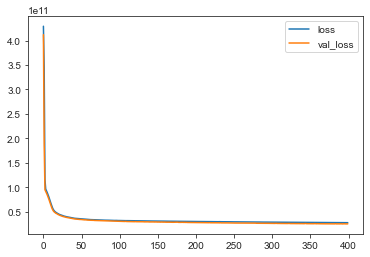

In [31]:
losses.plot()

hasil modelling menunjukan prediksi model yang saya buat fit dengan data tes tapi belum menyentuh overfitting, model ini bisa  saya gunakan untuk prediksi data selanjutnya.

## Evaluation

In [32]:
predictions = model.predict(X_test)

In [33]:
mean_absolute_error(y_test,predictions)

100008.84789858217

In [34]:
np.sqrt(mean_squared_error(y_test,predictions))

159070.3140204636

In [35]:
df['price'].mean()

540296.5735055795

bila dibandingkan dengan harga rataan, nilainya errornya hampir 20% nya,hingga saya coba hitung varian scorenya

In [36]:
explained_variance_score(y_test,predictions)

0.8099430117639227

dari kurva bisa dilihat bahwa model yang saya buat bisa memprediksi dengan baik pada rumah dengan harga 2 juta dollar


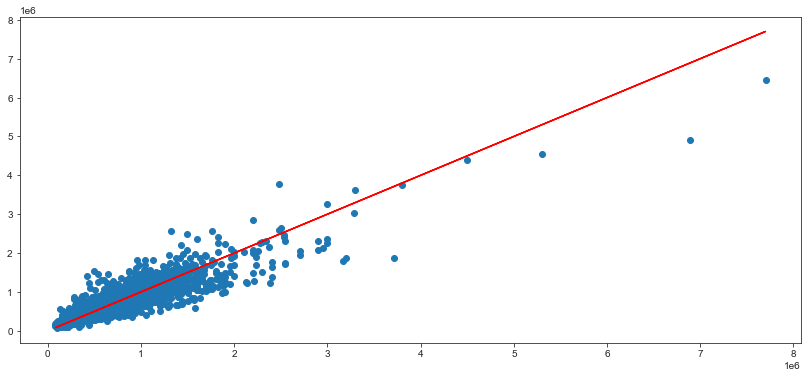

In [46]:
plt.figure(figsize=(14,6))

#prediksi
plt.scatter(y_test,predictions)

#prediksi sempurna
plt.plot(y_test,y_test,'r')

print('dari kurva bisa dilihat bahwa model yang saya buat bisa memprediksi dengan baik pada rumah dengan harga 2 juta dollar')

In [38]:
errors = y_test.values.reshape(6480, 1) - predictions

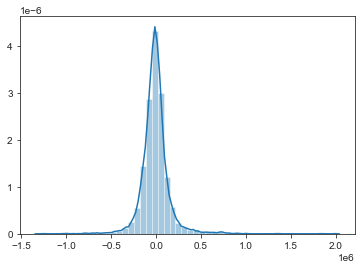

In [39]:
sns.distplot(errors)

## Test Model

In [62]:
import random
random.seed(2000)
random_ind = random.randint(0,len(df))

single_house = df.drop('price',axis=1).iloc[random_ind]
single_house = scaler.transform(single_house.values.reshape(-1, 19))

model.predict(single_house)

array([[381728.25]], dtype=float32)

saya melakukan pengujian menggunakan data random sekitar 10% dari jumlah total data  

In [61]:
df.iloc[random_ind]['price']

383000.0

harga rumah hasil prediksi pada data random adalah sebesar 381.728 dollar, sedangkan data aktualnya harga rumah tersebut adalah 383.000 dollar. 

# Terima Kasih